### 0️⃣ Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

id = pd.read_csv('ieee-fraud-detection/train_identity.csv')
trans = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
print(id.shape)
id.head(10)


(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [2]:
# Merge Data
df = trans.merge(id, on='TransactionID', how='left')

# Missing Information
def missing_info(df):
    return pd.DataFrame({
        "Datatype": df.dtypes,
        "Not null values": df.count(),
        "Null values": df.isnull().sum(),
        "Percentage of Null values": (df.isnull().mean()) * 100,
        "Unique count": df.nunique()
    })

missing_info(df)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
TransactionID,int64,590540,0,0.000000,590540
isFraud,int64,590540,0,0.000000,2
TransactionDT,int64,590540,0,0.000000,573349
TransactionAmt,float64,590540,0,0.000000,20902
ProductCD,object,590540,0,0.000000,5
...,...,...,...,...,...
id_36,object,140985,449555,76.126088,2
id_37,object,140985,449555,76.126088,2
id_38,object,140985,449555,76.126088,2
DeviceType,object,140810,449730,76.155722,2


### 1️⃣ EDA

In [3]:
# 컬럼별 NaN 개수 확인
for (i, k) in zip(trans.isnull().sum().sort_values(ascending=False).index, trans.isnull().sum().sort_values(ascending=False).values) :
    print(i, k)

dist2 552913
D7 551623
D13 528588
D14 528353
D12 525823
D6 517353
D9 515614
D8 515614
V153 508595
V139 508595
V162 508595
V161 508595
V154 508595
V138 508595
V158 508595
V157 508595
V163 508595
V156 508595
V155 508595
V149 508595
V148 508595
V147 508595
V146 508595
V142 508595
V141 508595
V140 508595
V151 508589
V152 508589
V145 508589
V144 508589
V150 508589
V143 508589
V160 508589
V166 508589
V164 508589
V159 508589
V165 508589
V322 508189
V332 508189
V338 508189
V337 508189
V336 508189
V335 508189
V334 508189
V333 508189
V331 508189
V323 508189
V330 508189
V328 508189
V327 508189
V326 508189
V325 508189
V324 508189
V329 508189
V339 508189
V240 460110
V235 460110
V252 460110
V249 460110
V248 460110
V247 460110
V246 460110
V244 460110
V243 460110
V242 460110
V241 460110
V237 460110
V236 460110
V233 460110
V254 460110
V232 460110
V231 460110
V230 460110
V229 460110
V228 460110
V217 460110
V226 460110
V225 460110
V224 460110
V223 460110
V218 460110
V253 460110
V219 460110
V266 460110
V2

In [4]:
for (i, k) in zip(id.isnull().sum().sort_values(ascending=False).index, id.isnull().sum().sort_values(ascending=False).values) :
    print(i, k)

id_24 139486
id_25 139101
id_07 139078
id_08 139078
id_21 139074
id_26 139070
id_23 139064
id_27 139064
id_22 139064
id_18 99120
id_03 77909
id_04 77909
id_33 70944
id_09 69307
id_10 69307
id_30 66668
id_32 66647
id_34 66428
id_14 64189
DeviceInfo 25567
id_13 16913
id_16 14893
id_06 7368
id_05 7368
id_20 4972
id_19 4915
id_17 4864
id_31 3951
DeviceType 3423
id_02 3361
id_28 3255
id_29 3255
id_11 3255
id_15 3248
id_35 3248
id_36 3248
id_37 3248
id_38 3248
id_01 0
id_12 0
TransactionID 0


In [5]:
for col in id.columns :
  print(col, id[col].value_counts().sum())

TransactionID 144233
id_01 144233
id_02 140872
id_03 66324
id_04 66324
id_05 136865
id_06 136865
id_07 5155
id_08 5155
id_09 74926
id_10 74926
id_11 140978
id_12 144233
id_13 127320
id_14 80044
id_15 140985
id_16 129340
id_17 139369
id_18 45113
id_19 139318
id_20 139261
id_21 5159
id_22 5169
id_23 5169
id_24 4747
id_25 5132
id_26 5163
id_27 5169
id_28 140978
id_29 140978
id_30 77565
id_31 140282
id_32 77586
id_33 73289
id_34 77805
id_35 140985
id_36 140985
id_37 140985
id_38 140985
DeviceType 140810
DeviceInfo 118666


0    569877
1     20663
Name: isFraud, dtype: int64


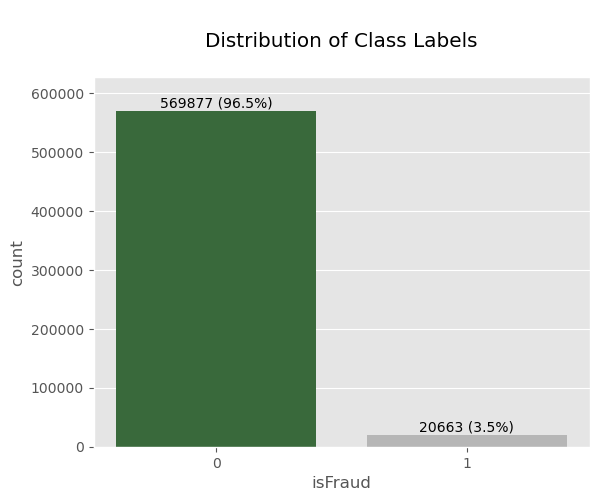

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

occurrences = trans['isFraud'].value_counts()
print(occurrences)
# Create a count plot to visualize the distribution of Fraud
ax = sns.countplot(x='isFraud', data=trans, palette=['#317134','#B6B6B6'])

plt.title("\nDistribution of Class Labels\n")

# Set plot margins
plt.margins(0.05, 0.1)

# Annotate each bar with the count and percentage of occurrences
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{} ({:.1f}%)'.format(int(y), 100. * y / len(trans)), (x.mean(), y),
                ha='center', va='bottom')

# Show the plot
plt.show()

##### id  EDA

In [7]:
# id_01 ~ id_11 까지 분석
# df_id = df[['isFraud','id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
#        'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
#        'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
#        'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
#        'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']]
df_id = df[['isFraud','id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11']]
missing_info(df_id)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
isFraud,int64,590540,0,0.000000,2
id_01,float64,144233,446307,75.576083,77
id_02,float64,140872,449668,76.145223,115655
id_03,float64,66324,524216,88.768923,24
id_04,float64,66324,524216,88.768923,15
id_05,float64,136865,453675,76.823755,93
id_06,float64,136865,453675,76.823755,101
id_07,float64,5155,585385,99.127070,84
id_08,float64,5155,585385,99.127070,94
id_09,float64,74926,515614,87.312290,46


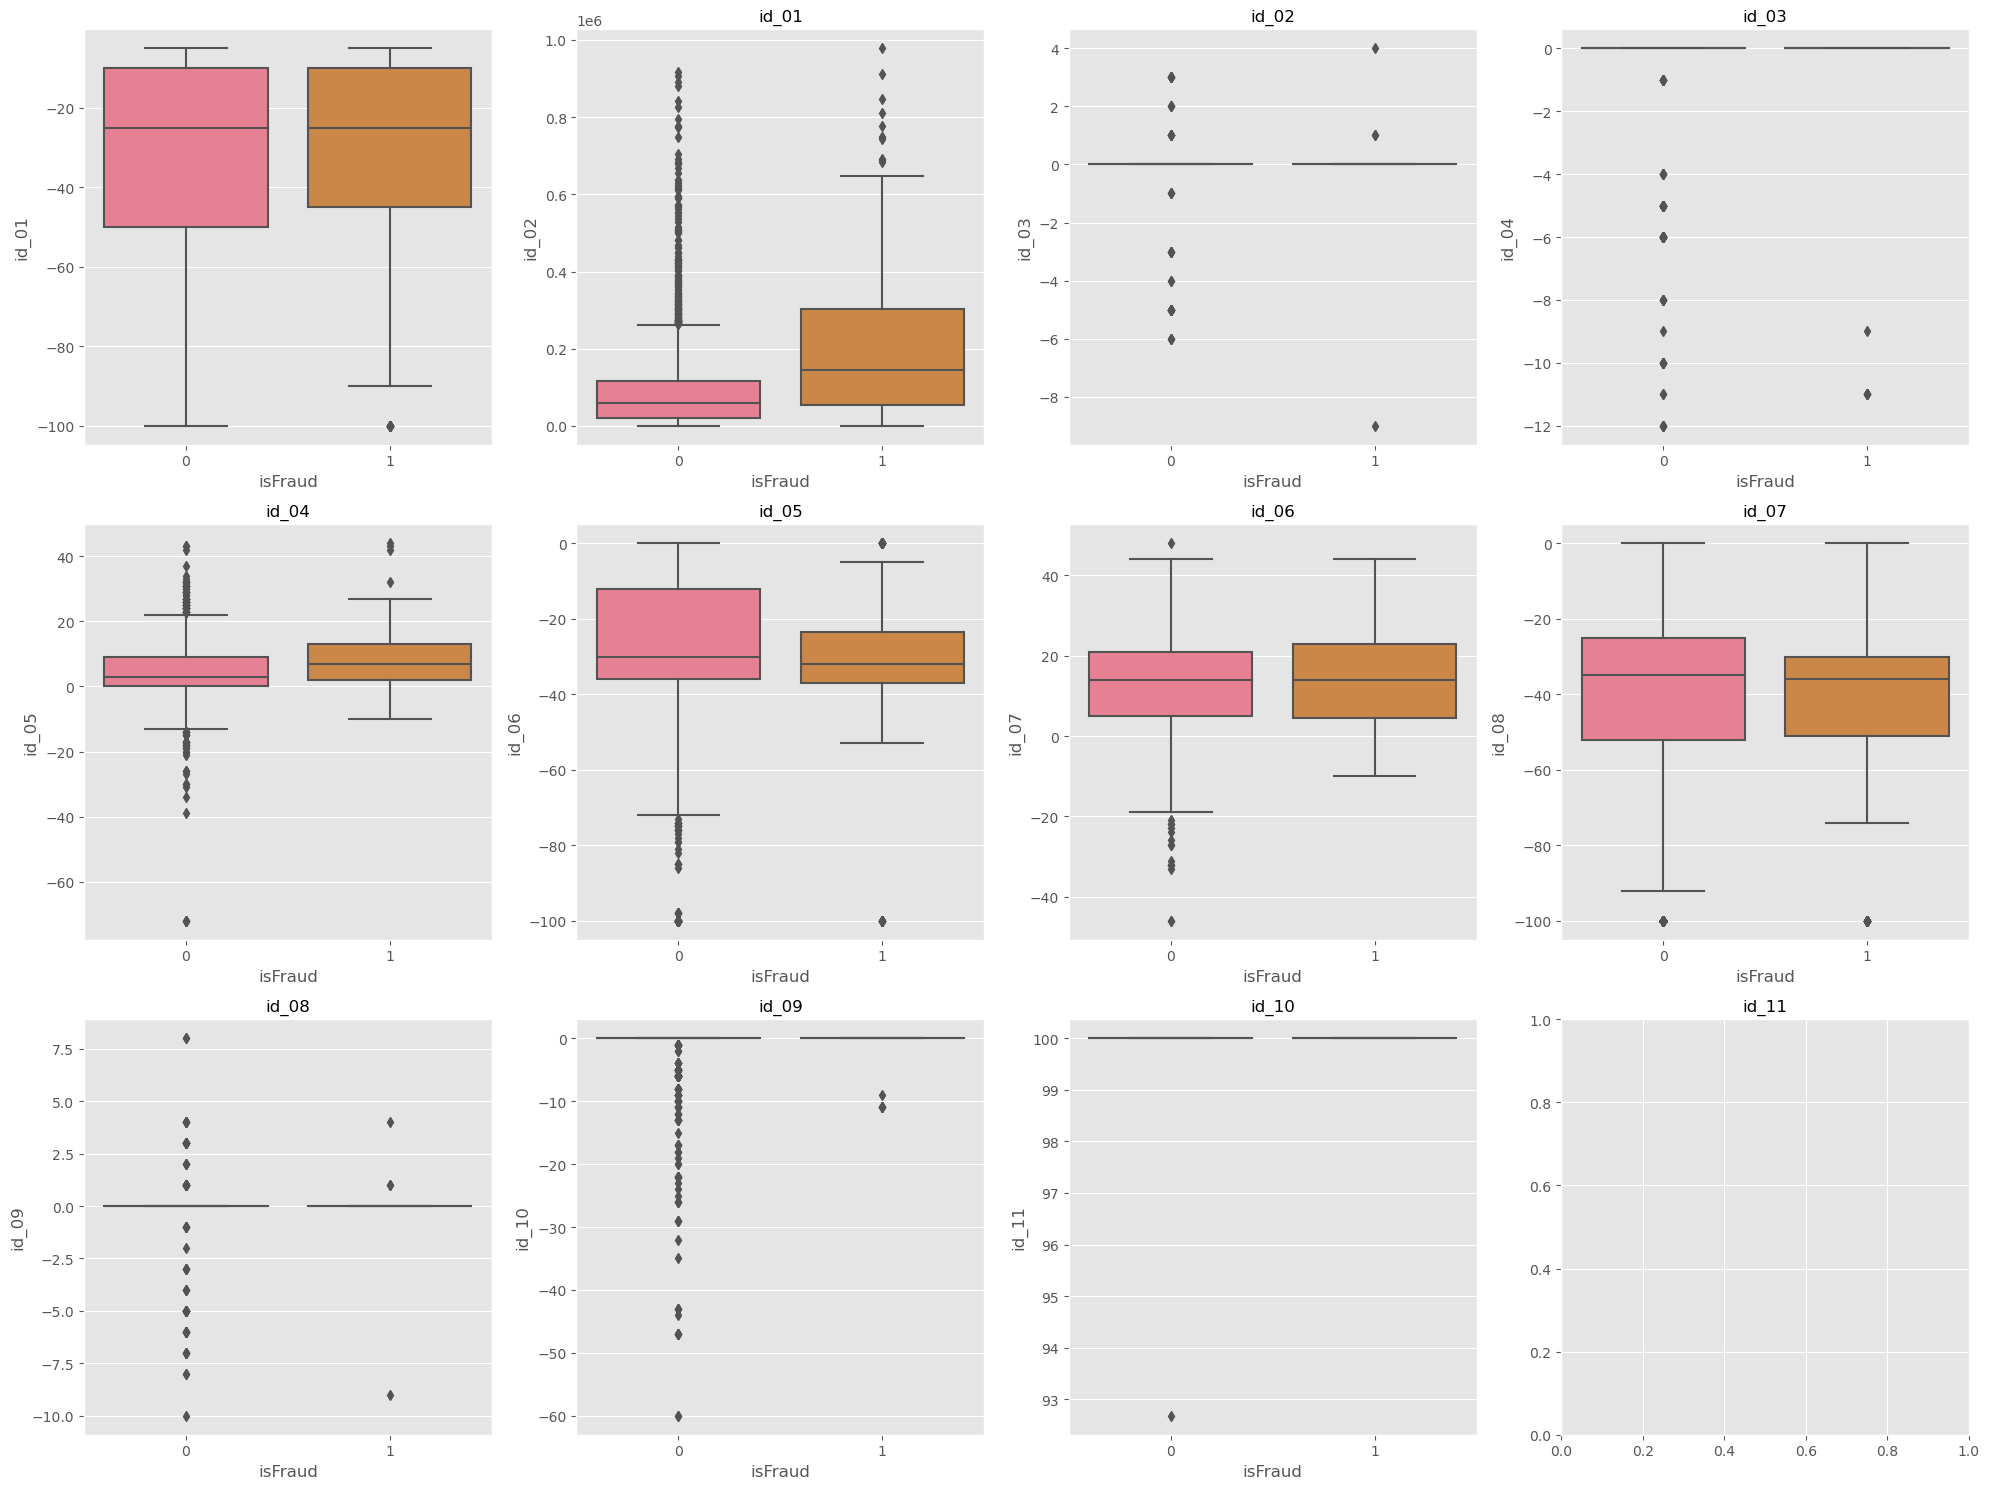

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

df_id_notnull = df_id.dropna()
grouped = df_id_notnull.groupby('isFraud').describe()
palette = sns.color_palette("husl", len(df_id_notnull.columns) - 1)


for i, column in enumerate(df_id_notnull.columns):
  if column != 'isFraud' :
      sns.boxplot(y=column, x='isFraud', data=df_id_notnull, ax=axes[i-1], palette=palette)
      axes[i].set_title(column, fontsize=12)
      axes[i].set_xlabel('')
      axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [9]:
# NaN인지 아닌지에 따라 비교
def nan_to_indicator(val):
    if pd.isnull(val):
        return 1
    else:
        return 0

# 결측치인지 아닌지에 따라 fraud 별 비율 계산
def fraud_by_nan(columns) : # 맨 앞에 isFraud 가 오도록
  temp_columns = df[columns]
  temp_null = temp_columns[columns[1:]].applymap(nan_to_indicator)
  temp_null['isFraud'] = temp_columns['isFraud']
  display(temp_null.groupby('isFraud').mean())


fraud_by_nan(['isFraud','id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11'])
fraud_by_nan(['isFraud','id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
       'id_25', 'id_26', 'id_27', 'id_28', 'id_29'])
fraud_by_nan(['isFraud','id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'])

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
isFraud,,,,,,,,,,,
0,0.766765,0.772495,0.896097,0.896097,0.779105,0.779105,0.991702,0.991702,0.882257,0.882257,0.772302
1,0.452258,0.456904,0.655810,0.655810,0.468519,0.468519,0.979383,0.979383,0.621207,0.621207,0.457097


,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29
isFraud,,,,,,,,,,,,,,,,,,
0,0.766765,0.795163,0.865822,0.772296,0.790853,0.774823,0.927391,0.774899,0.774987,0.991695,0.991677,0.991677,0.992376,0.991726,0.991686,0.991677,0.772302,0.772302
1,0.452258,0.487587,0.826792,0.456904,0.508687,0.465421,0.819242,0.465808,0.466147,0.979383,0.979383,0.979383,0.980545,0.979819,0.979432,0.979383,0.457097,0.457097


,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
isFraud,,,,,,,,,
0,0.869932,0.773441,0.869911,0.877296,0.869586,0.772296,0.772296,0.772296,0.772296
1,0.833422,0.459372,0.832986,0.837245,0.831341,0.456904,0.456904,0.456904,0.456904


➡️ Id 에서는 크게 특징을 못찾겠음

##### DeviceType EDA

In [73]:
temp = df[['isFraud','id_30','id_31','id_32','id_33','id_34','DeviceType','DeviceInfo']]

def check_nan(row):
    if row.isnull().all():
        return 1
    else:
        return 0

temp['isallnan'] = temp[['id_30','id_31','id_32','id_33','id_34','DeviceType','DeviceInfo']].apply(check_nan, axis=1)
temp
# 3)

,isFraud,id_30,id_31,id_32,id_33,id_34,DeviceType,DeviceInfo,isallnan
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,0,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,mobile,SAMSUNG SM-G892A Build/NRD90M,0
...,...,...,...,...,...,...,...,...,...
590535,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
590536,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
590537,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
590538,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [74]:
temp.groupby('isFraud')['isallnan'].mean()

isFraud
0    0.772311
1    0.457146
Name: isallnan, dtype: float64

In [79]:
print(len(temp[temp['isFraud'] == 1]))
print(temp[temp['isFraud'] == 1].isnull().sum())
print("=============================")
print(len(temp[temp['isFraud'] == 0]))
print(temp[temp['isFraud'] == 0].isnull().sum())

20663
isFraud           0
id_30         17221
id_31          9492
id_32         17212
id_33         17300
id_34         17178
DeviceType     9452
DeviceInfo    12056
isallnan          0
dtype: int64
569877
isFraud            0
id_30         495754
id_31         440766
id_32         495742
id_33         499951
id_34         495557
DeviceType    440278
DeviceInfo    459818
isallnan           0
dtype: int64


In [91]:
set(temp[temp['isFraud'] == 1]['DeviceInfo']) - set(temp[temp['isFraud'] == 0]['DeviceInfo'])

{'A466BG',
 'A5002',
 'A574BL Build/NMF26F',
 'Alumini3 Build/MRA58K',
 'Beat',
 'Blade L3 Build/KOT49H',
 'Dream',
 'G3123 Build/40.0.A.6.175',
 'Hisense E51 Build/LMY47V',
 'LG-D693n Build/KOT49I.V10a',
 'LGLK430',
 'Mi',
 'MotoG3-TE Build/MPD24.65-33',
 'N9560 Build/NMF26F',
 'NOKIA',
 'NX785QC8G',
 'Nexus 6 Build/MOB30M',
 'RCT6203W46 Build/KOT49H',
 'RNE-L23 Build/HUAWEIRNE-L23',
 'SAMSUNG-SM-N900A',
 'SM-A300M Build/KTU84P',
 'SM-G615F',
 'SM-G850M',
 'SM-G925T Build/LMY47X',
 'SM-G928F',
 'SM-G955F',
 'SM-J700T Build/MMB29K',
 'SM-N920A Build/MMB29K',
 'SM-T217S Build/KOT49H',
 'SM-T285M',
 'SM-T530',
 'TAB7',
 'VS5012 Build/NRD90M',
 'XT1021',
 'XT1033',
 'XT1609',
 'XT890 Build/9.8.2I-50_SML-25',
 'Z813 Build/LMY47O',
 'Z835 Build/NMF26V',
 'Z965 Build/NMF26V',
 'ZEIA8',
 'ZTE-Z835',
 'ZTE-Z956',
 'iPhone',
 'rv:14.0',
 'rv:29.0'}

In [93]:
set(temp[temp['isFraud'] == 1]['id_31']) - set(temp[temp['isFraud'] == 0]['id_31'])

{'Mozilla/Firefox', 'icedragon'}

```
의미 있는 Device 정보를 찾고 싶었으나 nan 이 너무 많음
모든 정보가 없는 행을 따져보면 Not Fraud 에서의 결측치가 더 많음

다만 비율상 id_31, DeviceType 은 fraud 일수록 결측치가 적음
▶️ id_31, DeviceType 만 사용
```

##### TransactionAMT, addr EDA

In [24]:
pd.DataFrame(df[['isFraud','addr1','addr2']].groupby('isFraud')['addr2'].value_counts())

count
isFraud addr2        
0       87.0   508004
        60.0     2805
        96.0      549
        32.0       85
        16.0       55
...               ...
1       75.0        1
        73.0        1
        68.0        1
        29.0        1
        36.0        1

[85 rows x 1 columns]

In [14]:
temp = df[['isFraud','TransactionAmt','addr1','addr2']]
temp_0 = temp[temp['isFraud'] == 0]
temp_1 = temp[temp['isFraud'] == 1]
display(temp_0['TransactionAmt'].describe())
display(temp_1['TransactionAmt'].describe())
print("==========================================")
print(f'Fraud : {len(temp_1)}   NotFraud : {len(temp_0)}')
print('Fraud 중 Null 비율: ', round(temp_1['addr1'].isnull().sum() / len(temp_1),3))
print('NotFraud 중 Null 비율: ', round(temp_0['addr1'].isnull().sum() / len(temp_0),3))

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

Fraud : 20663   NotFraud : 569877
Fraud 중 Null 비율:  0.375
NotFraud 중 Null 비율:  0.102


<Axes: xlabel='isnan', ylabel='TransactionAmt'>

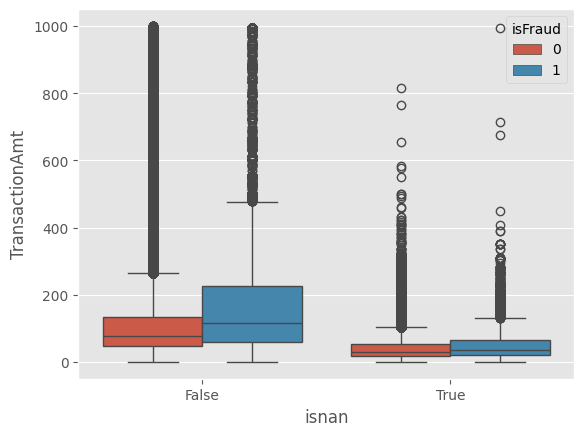

In [12]:
# addr 둘 다 없을 때 Amt 비교
temp = temp[temp['TransactionAmt'] < 1000]
temp['isnan'] = (temp['addr1'].isnull())
sns.boxplot(x='isnan', y='TransactionAmt', hue='isFraud', data=temp)

In [17]:
print(df['isFraud'].value_counts())
temp[temp['TransactionAmt'] > 1000]['isFraud'].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64


isFraud
0    7088
1     179
Name: count, dtype: int64

##### ProductCD EDA

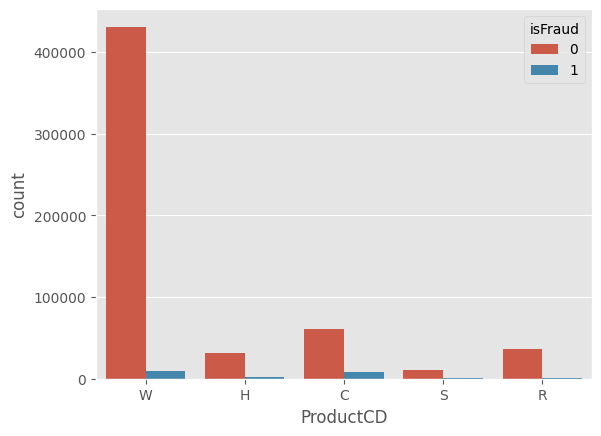

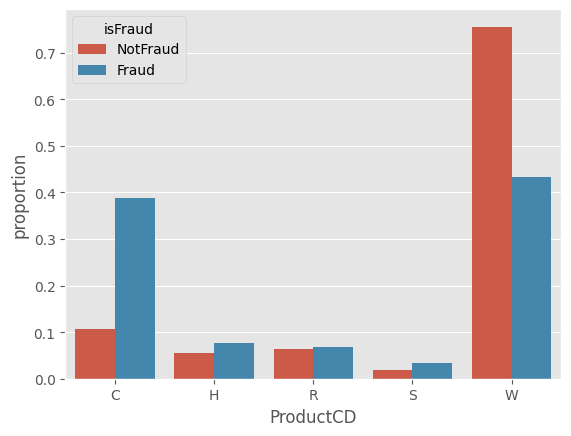

In [67]:
temp = df[['isFraud','ProductCD']]
temp_0 = temp[temp['isFraud'] == 0]
temp_1 = temp[temp['isFraud'] == 1]
# plt.bar(temp_0['ProductCD'].unique(), temp_0['ProductCD'].value_counts(normalize=True), width=0.4)
# plt.bar(temp_1['ProductCD'].unique(), temp_0['ProductCD'].value_counts(normalize=True), width=0.4)
# # temp_0['ProductCD'].value_counts(normalize=True).plot(kind='bar', fontsize=12)
# # temp_1['ProductCD'].value_counts(normalize=True).plot(kind='bar', fontsize=12)
# plt.gcf().set_size_inches(6,4)

sns.countplot(data=temp, x='ProductCD', hue='isFraud')
plt.show()

temp_df = pd.DataFrame({'NotFraud' : temp_0['ProductCD'].value_counts(normalize=True),
             'Fraud' : temp_1['ProductCD'].value_counts(normalize=True)})
df_melted = pd.melt(temp_df, var_name='isFraud', value_name='proportion', ignore_index=False)
sns.barplot(x='ProductCD',y='proportion',hue='isFraud',data=df_melted)
plt.show()

```
ProductCD 가 C인 제품의 사기 비율이 높음
▶️ ProductCD 컬럼을 더미변수화 해서 사용 예정
```

##### Email EDA

In [7]:
temp = df[['isFraud', 'P_emaildomain', 'R_emaildomain']]

df_email = df[['isFraud', 'P_emaildomain', 'R_emaildomain']]
df_email[['P_isnan', 'R_isnan']] = df[['P_emaildomain', 'R_emaildomain']].applymap(nan_to_indicator)
df_email['Sum'] = df_email['P_isnan'] + df_email['R_isnan']  # 기입한 개수
df_email['Same'] = (df_email['P_emaildomain'] == df_email['R_emaildomain'])

print("Fraud 별 P 이메일이 기입 되었는지에 대한 비율")
print(df_email.groupby('isFraud')['P_isnan'].mean())
print('')
print("Fraud 별 R 이메일이 기입 되었는지에 대한 비율")
print(df_email.groupby('isFraud')['R_isnan'].mean())
print('')
print("Fraud 별 둘 다 기입 되었는지에 대한 비율")
print(df_email.groupby('isFraud')['Sum'].value_counts())
print('')
print("Fraud 별 두 이메일이 같은지에 대한 비율")
print(df_email.groupby('isFraud')['Same'].value_counts())

Fraud 별 P 이메일이 기입 되었는지에 대한 비율
isFraud
0    0.160852
1    0.135024
Name: P_isnan, dtype: float64

Fraud 별 R 이메일이 기입 되었는지에 대한 비율
isFraud
0    0.778787
1    0.456662
Name: R_isnan, dtype: float64

Fraud 별 둘 다 기입 되었는지에 대한 비율
isFraud  Sum
0        1      372969
         0      115653
         2       81255
1        0       10574
         1        7952
         2        2137
Name: count, dtype: int64

Fraud 별 두 이메일이 같은지에 대한 비율
isFraud  Same 
0        False    477265
         True      92612
1        False     10771
         True       9892
Name: count, dtype: int64


In [ ]:
email1 = pd.DataFrame({'email' : trans[trans['isFraud'] == 1]['P_emaildomain'].value_counts().index,
                      'fraud_1' : trans[trans['isFraud'] == 1]['P_emaildomain'].value_counts().values})
email2 = pd.DataFrame({'email' : trans[trans['isFraud'] == 0]['P_emaildomain'].value_counts().index,
                      'fraud_0' : trans[trans['isFraud'] == 0]['P_emaildomain'].value_counts().values})
email = email1.merge(email2, how='outer', left_on='email', right_on='email')
print(len(trans[trans['isFraud'] == 1]['P_emaildomain'].value_counts().index), len(trans[trans['isFraud'] == 0]['P_emaildomain'].value_counts().index))
email

42 59


,email,fraud_1,fraud_0
0,gmail.com,9943.0,218412
1,hotmail.com,2396.0,42854
2,yahoo.com,2297.0,98637
3,anonymous.com,859.0,36139
4,aol.com,617.0,27672
5,outlook.com,482.0,4614
6,comcast.net,246.0,7642
7,icloud.com,197.0,6070
8,mail.com,106.0,453
9,msn.com,90.0,4002


In [ ]:
email = email.fillna(0)
email['fraud_0_ratio'] = email['fraud_0'] / email['fraud_0'].sum() * 100
email['fraud_1_ratio'] = email['fraud_1'] / email['fraud_1'].sum() * 100
email

,email,fraud_1,fraud_0,fraud_0_ratio,fraud_1_ratio
0,gmail.com,9943.0,218412,45.672726,55.631399
1,hotmail.com,2396.0,42854,8.961316,13.405696
2,yahoo.com,2297.0,98637,20.626251,12.851788
3,anonymous.com,859.0,36139,7.557124,4.806132
4,aol.com,617.0,27672,5.786567,3.452135
5,outlook.com,482.0,4614,0.964846,2.696805
6,comcast.net,246.0,7642,1.598039,1.376378
7,icloud.com,197.0,6070,1.269314,1.102221
8,mail.com,106.0,453,0.094728,0.593073
9,msn.com,90.0,4002,0.836869,0.503553


<Axes: ylabel='email'>

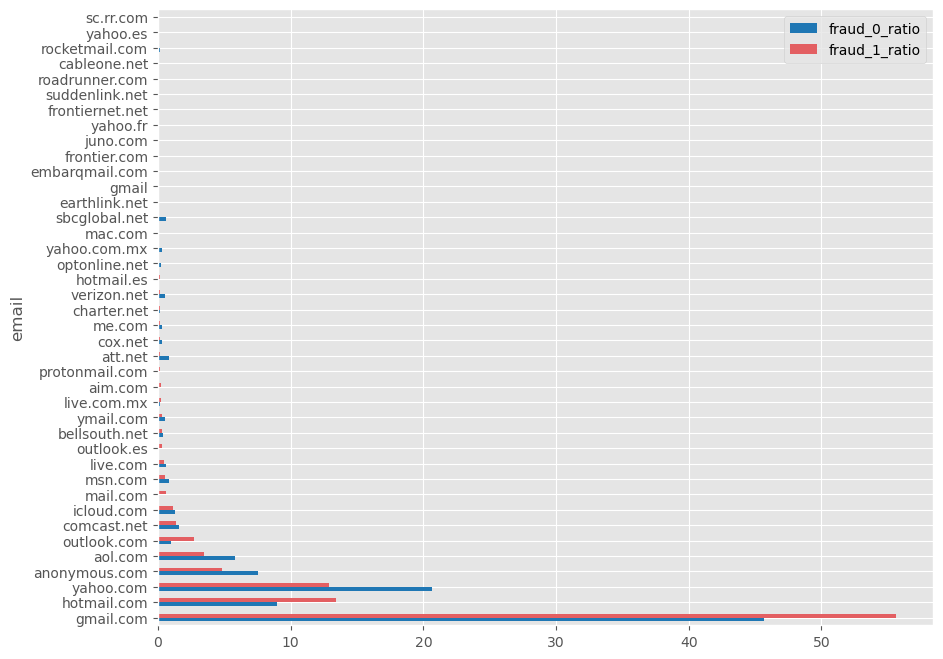

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

email.set_index('email')[['fraud_0_ratio', 'fraud_1_ratio']][:40].plot(kind='barh', figsize=(10,8), color=['#1f77b4','#e35f62'])

<Axes: ylabel='P_emaildomain'>

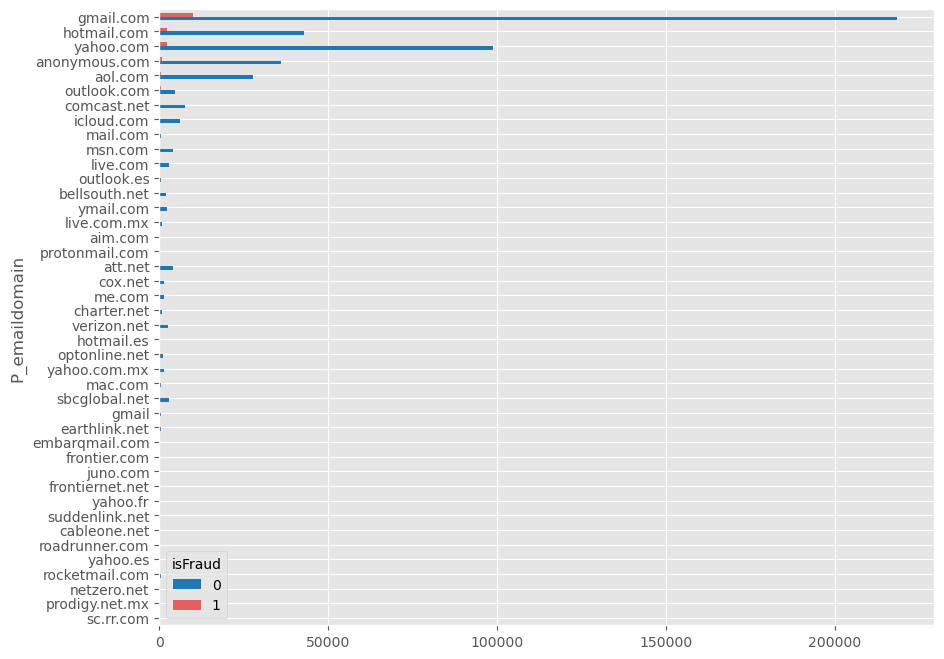

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

(
    trans
    .groupby('P_emaildomain')
    ['isFraud'].value_counts()
    .unstack()
    .sort_values(by=1, ascending=True)
    .loc[lambda x : x[1].notnull()].plot(kind='barh', figsize=(10,8), color=['#1f77b4','#e35f62'])
)